<a href="https://colab.research.google.com/github/TheTr1Noob/Project/blob/main/RisaRansomewareDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [ ]:
df = pd.read_csv('Final_Dataset_without_duplicate.csv')

Displaying the first and last 5 rows

In [ ]:
df.head()

,md5,sha1,file_extension,EntryPoint,PEType,MachineType,magic_number,bytes_on_last_page,pages_in_file,relocations,...,total_procsses,files_malicious,files_suspicious,files_text,files_unknown,dlls_calls,apis,Class,Category,Family
0,d5aa2b2506dd71b65307bb551a6a099d,62f4d55a1bb8396e493d7815dc44febed7161535,exe,0x108ec,PE32+,AMD AMD64,MZ,0x0090,0x0003,0x0000,...,0.0,0.0,0.0,0.0,0.0,6.0,162.0,Benign,Benign,Benign
1,8d1178cec97f96a9ede3efe2f30ef30e,ca40945a4e35d48794a5e13aacf16b8ae1caddeb,exe,0x25cf9c,PE32+,AMD AMD64,MZ,0x0090,0x0003,0x0000,...,93.0,0.0,0.0,0.0,0.0,22.0,778.0,Benign,Benign,Benign
2,c08d7afb7966f452cf5aa9283fe8880a,6f47b50480bea61ae4dfb75c12582990cc5ce770,exe,0x2a7e,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,35.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign,Benign,Benign
3,3554a3a99e7ffb57552aedcb2520f1d2,8c3d5b506a8d55f42f4c83ead3e4341255d1acfc,exe,0x64ca0,PE32+,AMD AMD64,MZ,0x0090,0x0003,0x0004,...,0.0,0.0,0.0,0.0,0.0,1.0,40.0,Benign,Benign,Benign
4,5be9511d42136df49d9501680e84109f,0a7d0c68c591db2f197b2169d226bebe6e9bdabe,exe,0x1b9ae,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,36.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign,Benign,Benign


In [ ]:
df.tail()

,md5,sha1,file_extension,EntryPoint,PEType,MachineType,magic_number,bytes_on_last_page,pages_in_file,relocations,...,total_procsses,files_malicious,files_suspicious,files_text,files_unknown,dlls_calls,apis,Class,Category,Family
21747,3aabbbed7dd5e3589f2387ec1a62471f,067d84bef48f6abc37226c6ccb981d21f7c8b93f,exe,0x889b6,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,29.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake
21748,c62343c3c6463795e88fe0a2a81c82b3,02df1939b04bc7de83c3029c5eb8e9b25cc9be91,exe,0x9a2f2,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,32.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake
21749,db92e74aee2f64a0b40a64c1a014e257,fde61811f7ae53f9fa59e17fb5c2c6143a48b282,exe,0x9a2f2,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,35.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake
21750,06e50d688d5b79ffea6135c7a55402cd,ad58274e8425775b284ee1f314f879100d437340,exe,0x9a2f2,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,29.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake
21751,981de70f5242ac1192bf182be3797e1b,d7ac568899333c823c589444286f9d3655992332,exe,0xa13ae,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,33.0,1.0,0.0,1.0,0.0,0.0,0.0,Malware,Stealer,Snake


Delete rows with missing values

In [ ]:
df.dropna(inplace=True)

Drop rows with duplicates values (this is not required with this csv file, since the authors say that this version of dataset doesn't have any duplicates)

In [ ]:
df.drop_duplicates(inplace=True)

Pick the class to use. We can pick either Class, Category, or Family for more or less details on the type of the attack.
*   Category has two values: benign and malware
*   Category has 5 values: benign, ransomware, RAT, stealer, and trojan
*   Family has 27 values: Benign, Cerber, DarkSide, Dharma, Gandcrab, LockBit, Maze, Phobos, Ragnar, REvil, Ryuk, Shade, WannaCry, Gh0st, Glupteba, NanoCore, njRat, Remcos, Ursnif, Agenttesla, Emotet, Guloader, Qbot, Formbook, Raccoon, RedLine, and Snake




In [ ]:
target = 'Class'

Change text columns to numeric (encoding)

In [ ]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Split the data based on target (class in this case) and remove the other two class columns Category and Familiy

In [ ]:
X = df.drop(columns=[target, "Category", "Family"])
y = df[target]

Standardize the columns to avoid scale problems (a columns with a wide range would affect the model more than column with small range)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split the data into train (80% of data) and test (20% of the data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(17401, 74)

In [ ]:
X_test.shape

(4351, 74)

Train a random forest model an display it's accuracy

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest accuracy: 0.9944840266605378
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2189
           1       0.99      1.00      0.99      2162

    accuracy                           0.99      4351
   macro avg       0.99      0.99      0.99      4351
weighted avg       0.99      0.99      0.99      4351



Using Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.9841415766490462
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2189
           1       0.99      0.98      0.98      2162

    accuracy                           0.98      4351
   macro avg       0.98      0.98      0.98      4351
weighted avg       0.98      0.98      0.98      4351



using XGBoost

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:05:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9940243622155827
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2189
           1       0.99      0.99      0.99      2162

    accuracy                           0.99      4351
   macro avg       0.99      0.99      0.99      4351
weighted avg       0.99      0.99      0.99      4351



Comapre the models


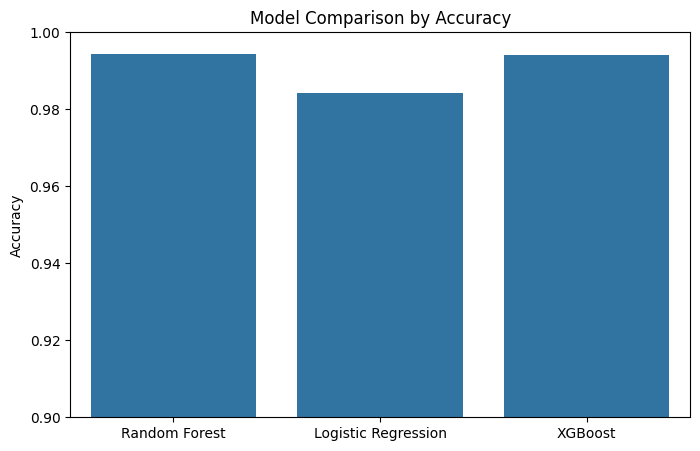

In [ ]:
models = ['Random Forest', 'Logistic Regression', 'XGBoost']
accuracies = [accuracy_score(y_test, rf_pred),accuracy_score(y_test, lr_pred),accuracy_score(y_test, xgb_pred)]
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.title("Model Comparison by Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1)
plt.show()


All the models yielded similar result with a small advantage for random forest

The purpose of of this small project is build several machine learning models that are Random Forest, Logistic Regression, and XGBoost using the Ransomware Dataset 2024 provided by Amjad Hussain (link [link text](https://zenodo.org/records/13890887)).  
We first loaded the data as Pandas dataframe and removed any rows that contains missing values. We also removed any duplocate rows, even though this was not really necessary, because the author asserts the duplicate rows were already discarded. Afterwards, we transformed the data from text to numeric using label encoding. We also, picked the the "Class" colum as the value to predict while discarding "Category" and "Family" which cotain more detailed classes.  
Next, we split the data into training and testing sets (80/20 ratio) to evaluate model performance effectively. Each model was then trained using the training data and evaluated on the test set using metrics such as accuracy and classification reports (precision, recall, F1-score).  
Finally, we compared the obtained models by visualizing their accuracy scores in a bar chart where we found out the Random Forest was the best ML model.

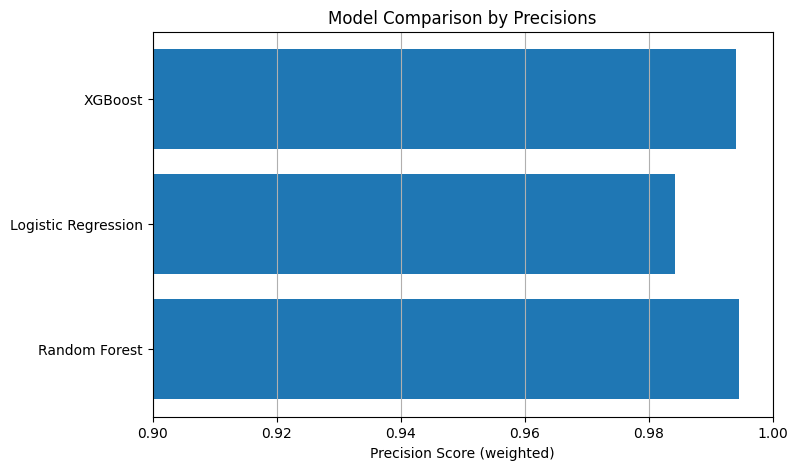

In [ ]:
models = ['Random Forest', 'Logistic Regression', 'XGBoost']
precisions = [precision_score(y_test, rf_pred, average='weighted'),precision_score(y_test, lr_pred, average='weighted'),precision_score(y_test, xgb_pred, average='weighted')]
plt.figure(figsize=(8, 5))
plt.barh(models, precisions)
plt.title("Model Comparison by Precisions")
plt.xlabel("Precision Score (weighted)")
plt.xlim(0.9, 1)
plt.grid(axis='x')
plt.show()

In [ ]:
print(accuracies)
print(precisions)

[0.9944840266605378, 0.9841415766490462, 0.9940243622155827]
[0.9935364727608494, 0.9869706840390879, 0.9935304990757856]
